In [122]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df.shape

(891, 12)

In [125]:
class Titanic:
    
    def __init__(self, way: str) -> None:
        self.df = pd.read_csv(way)
        
    def surv_class(self, num_class: int) -> str:
        surv_peop = self.df[(self.df.Pclass == num_class) & (self.df.Survived == 1)].shape[0]
        all_peop = self.df[self.df.Pclass == num_class].shape[0]
        
        return f'Процент выживших в {num_class} классе: {round(surv_peop / all_peop * 100, 2)}%'
    
    def surv_sex(self, sex: str) -> str:
        surv_peop = self.df[(self.df.Sex == sex) & (self.df.Survived == 1)].shape[0]
        all_peop = self.df[self.df.Sex == sex].shape[0]
        
        return f'Процент выживших {sex} пола: {round(surv_peop / all_peop * 100, 2)}%'
    
    def surv_age(self, age: float) -> str:
        if age <= 18:
            perc_surv = (self.df[(self.df.Age <= 18) & (self.df.Survived == 1)].shape[0] /
                        self.df[self.df.Age <= 18].shape[0]) 
            return f'Процент виживших в возрасте до 18 лет: {round(perc_surv * 100, 2)}%'
        
        elif 18 < age and age <= 35:
            perc_surv = (df[((df.Age <= 35) & (df.Age > 18)) & (df.Survived == 1)].shape[0] /
                        df[(df.Age <= 35) & (df.Age > 18)].shape[0])
            return f'Процент виживших в возрасте от 18 до 35 лет: {round(perc_surv * 100, 2)}%'
            
        elif 35 < age and age <= 60:
            perc_surv = (df[((df.Age <= 60) & (df.Age > 35)) & (df.Survived == 1)].shape[0] /
                        df[(df.Age <= 60) & (df.Age > 35)].shape[0])
            return f'Процент виживших в возрасте от 35 до 60 лет: {round(perc_surv * 100, 2)}%'
            
        else:
            perc_surv = (self.df[(self.df.Age >= 60) & (self.df.Survived == 1)].shape[0] /
                        self.df[self.df.Age >= 60].shape[0])
            return f'Процент виживших в возрасте после 60 лет: {round(perc_surv * 100, 2)}%'
        
    def surv_fam(self, count_sib: int, count_ch: int) -> str:
        if 0 <= count_sib <= 2 and 0 <= count_ch <= 2:
            perc_surv = (df[(df.SibSp <= 2) & (df.Parch <= 2) & (df.Survived == 1)].shape[0] /
                        df[(df.SibSp <= 2) & (df.Parch <= 2)].shape[0])
            return f'Процент виживших, кто путешествовал один {round(perc_surv * 100, 2)}%'
        
        else:
            perc_surv = (df[((df.SibSp >= 2) & (df.Parch >= 2)) & (df.Survived == 1)].shape[0] /
                        df[((df.SibSp >= 2) & (df.Parch >= 2))].shape[0])
            return f'Процент виживших, кто путешествовал c семьей {round(perc_surv * 100, 2)}%'
        
    def surv_fare(self, price: float) -> str:
        if price <= 8:
            perc_surv = (self.df[(self.df.Fare <= 8) & (self.df.Survived == 1)].shape[0] /
                        self.df[self.df.Fare <= 8].shape[0]) 
            return f'Процент виживших c дешевым билетом: {round(perc_surv * 100, 2)}%'
        
        elif 8 < price and price <= 15:
            perc_surv = (df[((df.Fare <= 15) & (df.Fare > 8)) & (df.Survived == 1)].shape[0] /
                        df[(df.Fare <= 15) & (df.Fare > 8)].shape[0])
            return f'Процент виживших со средним билетом: {round(perc_surv * 100, 2)}%'
            
        elif 15 < price and price <= 32:
            perc_surv = (df[((df.Fare <= 32) & (df.Fare > 15)) & (df.Survived == 1)].shape[0] /
                        df[(df.Fare <= 32) & (df.Fare > 15)].shape[0])
            return f'Процент виживших с билетом выше среднего: {round(perc_surv * 100, 2)}%'
            
        else:
            perc_surv = (self.df[(self.df.Fare >= 32) & (self.df.Survived == 1)].shape[0] /
                        self.df[self.df.Fare >= 32].shape[0])
            return f'Процент виживших с дорогим билетом: {round(perc_surv * 100, 2)}%'
        
    def graph(self, x_values, y_values, title='График', 
              x_label='X', y_label='Y') -> None:
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
        plt.title(title)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.grid(True)
        plt.show()
        
        

In [126]:
data = Titanic('D:/train.csv')
data.surv_class(1)

'Процент выживших в 1 классе: 62.96%'

In [109]:
data.surv_class(3)

'Процент выживших в 3 классе: 24.24%'

In [110]:
data.surv_class(2)

'Процент выживших в 2 классе: 47.28%'

In [111]:
data.surv_sex('male')

'Процент выживших male пола: 18.89%'

In [112]:
data.surv_sex('female')

'Процент выживших female пола: 74.2%'

In [113]:
data.surv_age(70)

'Процент виживших в возрасте после 60 лет: 26.92%'

In [114]:
data.surv_fam(0, 0)

'Процент виживших, кто путешествовал один 39.88%'

In [115]:
data.surv_fam(0, 4)

'Процент виживших, кто путешествовал c семьей 24.24%'

In [116]:
data.surv_fam(4, 4)

'Процент виживших, кто путешествовал c семьей 24.24%'

In [117]:
data.surv_fam(0, 1)

'Процент виживших, кто путешествовал один 39.88%'

In [118]:
data.surv_fare(80)

'Процент виживших с дорогим билетом: 59.72%'

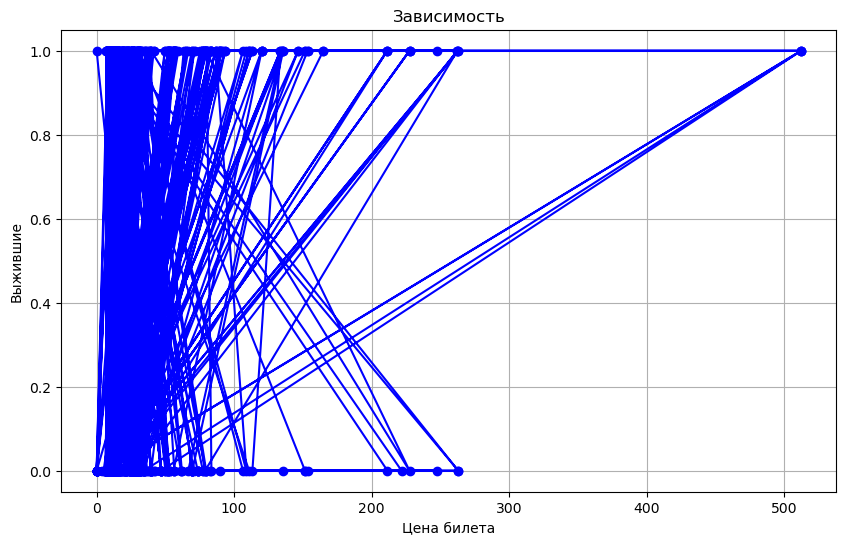

In [127]:
data.graph(df['Fare'], df['Survived'], 'Зависимость', 'Цена билета', 'Выжившие')